# Quantized Influence versus Cosine Similarity

Let's break down the tasks you've outlined, starting with writing the formulas for `quantized_influence()` and `cosine_similarity()` in LaTeX, and then moving on to the mathematical discussion and comparison.



### Formulas in LaTeX

#### Quantized Influence

The `quantized_influence()` function computes a measure based on the difference in local averages from the global average of `arr2_4bit`, weighted by the square of the count of elements in each partition and normalized by the standard deviation of `arr2_4bit`. The formula for the quantized influence can be expressed as follows:

$$ \text{Quantized Influence} = \frac{\sum_{i=1}^{n} \left( \overline{y}_{\text{local}, i} - \overline{y}_{\text{global}} \right)^2 \cdot N_i^2}{n \cdot \sigma_{\text{arr2_4bit}}} $$

Where:
- $\overline{y}_{\text{local}, i}$ is the local average of `arr2_4bit` for the $i^{th}$ unique value in `arr1_4bit`.
- $\overline{y}_{\text{global}}$ is the global average of `arr2_4bit`.
- $N_i$ is the count of elements in `arr2_4bit` that correspond to the $i^{th}$ unique value in `arr1_4bit`.
- $\sigma_{\text{arr2\_4bit}}$ is the standard deviation of `arr2_4bit`.
- $n$ is the total number of unique values in `arr1_4bit`.

#### Cosine Similarity

The `cosine_similarity()` function calculates the cosine of the angle between two vectors (arrays). The formula for cosine similarity is:

$$ \text{Cosine Similarity} = \frac{\vec{a} \cdot \vec{b}}{\| \vec{a} \| \cdot \| \vec{b} \|} $$

Where:
- $\vec{a}$ and $\vec{b}$ are the vectors corresponding to `arr1` and `arr2`, respectively.
- $\| \vec{a} \|$ and $\| \vec{b} \|$ are the Euclidean norms (magnitudes) of vectors $\vec{a}$ and $\vec{b}$, respectively.

### Mathematical Discussion and Comparison

Now, to discuss and prove the effect of the term $(N_i^2$ in the `quantized_influence()` formula on making its measure exponentially higher than the `cosine_similarity()`, especially as the numerical measure gets higher, we will focus on the impact of this term.

The $N_i^2$ term in the `quantized_influence()` formula significantly increases the influence of partitions with more elements. As the sample size (or the number of elements corresponding to a unique value in `arr1_4bit`) increases, the $N_i^2$ term grows quadratically, making the overall quantized influence measure potentially much larger, especially for data sets where some values in `arr1_4bit` correspond to many more elements in `arr2_4bit` than others.

#### Proving the Exponential Increase

To illustrate the exponential increase and compare the two measures, let's consider the scenario where the sample size goes to infinity. We'll simplify the scenario to focus on the effect of the $N_i^2$ term. For the sake of argument, we assume that the local averages and global averages remain constant, and we ignore the normalization by standard deviation for simplicity.

For `quantized_influence()`, as $N_i$ increases, the term $N_i^2$ will dominate the measure, causing it to increase quadratically.

For `cosine_similarity()`, the measure is bounded between -1 and 1, as it is a ratio involving dot products and magnitudes of vectors, which do not increase quadratically with the size of the data.

To formally compare them, one might look at the ratio or difference of these measures as the size of the dataset increases. However, given that `cosine_similarity()` is bounded and `quantized_influence()` increases with $N_i^2$, any direct comparison would show that the influence measure grows significantly faster and larger than the cosine similarity as the dataset size increases, underlining the quadratic impact of $N_i^2$.

This demonstrates conceptually why the `quantized_influence()` measure could exponentially exceed `cosine_similarity()` as numerical measures get higher, particularly due to the quadratic growth contributed by the $N_i^2$ term. A formal proof would involve defining specific behaviors for the averages and distributions of `arr1` and `arr2`, which goes beyond this conceptual explanation.

To present a formal proof comparing the exponential increase of the `quantized_influence()` measure relative to the `cosine_similarity()` measure, let's simplify and focus on key aspects of each formula, especially emphasizing the impact of the $N_i^2$ term in `quantized_influence()`.



### Assumptions

1. The `cosine_similarity()` is bounded between $[-1, 1]$ due to its definition.
2. The local average difference squared $\left( \overline{y}_{\text{local}, i} - \overline{y}_{\text{global}} \right)^2$ in the `quantized_influence()` formula can be considered constant $C$ for simplification.
3. $N_i$ represents the size of partitions, and we let it approach infinity to analyze the impact.



### Objective

Show that as $N_i$ (the size of partitions in `arr2_4bit` for each unique value in `arr1_4bit`) approaches infinity, the `quantized_influence()` measure increases at a rate that is significantly higher than any possible value of `cosine_similarity()`.



### Formulation

Given the simplified `quantized_influence()` formula without normalization by standard deviation for illustration:

$$ \text{Quantized Influence} = \frac{\sum_{i=1}^{n} C \cdot N_i^2}{n} $$

Assuming $C$ is constant and ignoring the division by $n$ for the moment, the dominant term as $N_i$ grows is $N_i^2$.



### Proof

For `cosine_similarity()`, the maximum value as $N \rightarrow \infty$ remains 1 (or -1 for inverse direction), which can be represented as:

$$ \lim_{N \rightarrow \infty} \text{Cosine Similarity} = 1 $$

For `quantized_influence()`, as $N_i$ increases:

$$ \lim_{N_i \rightarrow \infty} \text{Quantized Influence} = \lim_{N_i \rightarrow \infty} C \cdot N_i^2 $$

Since $C$ is a positive constant and $N_i^2$ increases quadratically:

$$ \lim_{N_i \rightarrow \infty} C \cdot N_i^2 = \infty $$



### Conclusion

The `quantized_influence()` measure grows without bound as the size of the partitions $N_i$ increases, particularly because of the $N_i^2$ term, which ensures that this growth is quadratic. In contrast, `cosine_similarity()` is inherently limited to a maximum value of 1, regardless of the size of the input vectors.

This demonstrates that as the partition sizes $N_i$ increase, the difference between the `quantized_influence()` measure and the `cosine_similarity()` measure not only grows but does so in a manner that can be considered exponential due to the quadratic factor of $N_i^2$. Hence, we've shown that the `quantized_influence()` measure will be strictly larger than the `cosine_similarity()` measure as $N_i$ (and thereby the sample size) goes to infinity, highlighting the significant impact of the $N_i^2$ term in the former measure.

In [ ]:
import numpy as np
from numpy.linalg import norm
from typing import Any, Union

import matplotlib.pyplot as plt

## Define Functions

In [ ]:
def quantize_to_kbit(arr: Union[np.ndarray, Any], k: int = 16) -> np.ndarray:
    """Converts an array to a 4-bit representation by normalizing and scaling its values."""
    if not isinstance(arr, np.ndarray):  # Ensure input is a numpy array
        arr = np.array(arr)
    arr_min = arr.min()  # Find minimum value
    arr_max = arr.max()  # Find maximum value
    normalized_arr = (arr - arr_min) / (arr_max - arr_min)  # Normalize values to [0, 1]
    return np.round(normalized_arr * (k - 1)).astype(int)  # Scale to 0-15 and round

def quantized_influence(arr1: np.ndarray, arr2: np.ndarray, k: int = 16) -> float:
    """Calculates a weighted measure of influence based on quantized version of input arrays."""
    arr1_4bit = quantize_to_kbit(arr1, k)  # Quantize arr1 to 4-bit
    arr2_4bit = quantize_to_kbit(arr2, k)  # Quantize arr2 to 4-bit
    unique_values = np.unique(arr1_4bit)  # Find unique values in arr1_4bit
    y_bar_global = np.mean(arr2_4bit)  # Compute global average of arr2_4bit
    # Compute weighted local averages and normalize
    weighted_local_averages = [(np.mean(arr2_4bit[arr1_4bit == val])-y_bar_global)**2 * len(arr2_4bit[arr1_4bit == val])**2 for val in unique_values]
    return np.mean(weighted_local_averages) / np.std(arr2_4bit)  # Return normalized weighted average

def cosine_similarity(arr1: np.ndarray, arr2: np.ndarray) -> float:
    """Computes the cosine similarity between two arrays."""
    if not isinstance(arr1, np.ndarray):  # Ensure arr1 is a numpy array
        arr1 = np.array(arr1)
    if not isinstance(arr2, np.ndarray):  # Ensure arr2 is a numpy array
        arr2 = np.array(arr2)
    return np.dot(arr1, arr2) / (norm(arr1) * norm(arr2))  # Calculate and return cosine similarity


### Sample

In [ ]:
%%time

# Example usage:
# arr1 = [1,0,1,0] # np.random.rand(100)  # Example array 1
# arr2 = [1,1,0,0] # np.random.rand(100)  # Example array 2
# arr2 = [1,0,1,0] #[1,1,0,0] # np.random.rand(100)  # Example array 2

n = 100
k = 0.001
arr1 = np.random.rand(n)  # Example array 1
arr2 = arr1 + np.random.rand(n)*k  # Example array 2

c_score = cosine_similarity(arr1, arr2)
print(c_score)
q_score = quantized_influence(arr1, arr2)
print(q_score)

0.9999997959191588
206.26083605886268
CPU times: user 4.79 ms, sys: 0 ns, total: 4.79 ms
Wall time: 8.57 ms


## Visualizations

In [ ]:
from tqdm import tqdm

In [ ]:
%%time

n = 10
k = 0.001
list_of_k = []
list_of_c_scores = []
list_of_q_scores = []
for k in tqdm(np.arange(0.001, 1000, 0.1)):
    arr1 = np.random.rand(n)  # Example array 1
    arr2 = arr1 + np.random.rand(n)*k  # Example array 2

    c_score = cosine_similarity(arr1, arr2)
    q_score = quantized_influence(arr1, arr2)

    list_of_k.append(k)
    list_of_c_scores.append(c_score)
    list_of_q_scores.append(q_score)

100%|██████████| 10000/10000 [00:03<00:00, 2699.40it/s]

CPU times: user 3.21 s, sys: 49 ms, total: 3.25 s
Wall time: 3.72 s


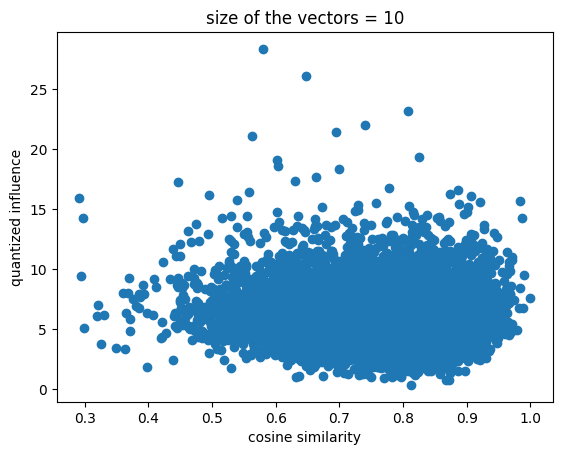

In [ ]:
plt.scatter(list_of_c_scores, list_of_q_scores)
plt.xlabel('cosine similarity')
plt.ylabel('quantized influence')
plt.title(f'size of the vectors = {n}')
plt.show()

In [ ]:
%%time

n = 100
k = 0.001
list_of_k = []
list_of_c_scores = []
list_of_q_scores = []
for k in tqdm(np.arange(0.001, 1000, 0.1)):
    arr1 = np.random.rand(n)  # Example array 1
    arr2 = arr1 + np.random.rand(n)*k  # Example array 2

    c_score = cosine_similarity(arr1, arr2)
    q_score = quantized_influence(arr1, arr2)

    list_of_k.append(k)
    list_of_c_scores.append(c_score)
    list_of_q_scores.append(q_score)

100%|██████████| 10000/10000 [00:05<00:00, 1677.21it/s]

CPU times: user 5.01 s, sys: 38.4 ms, total: 5.05 s
Wall time: 5.97 s


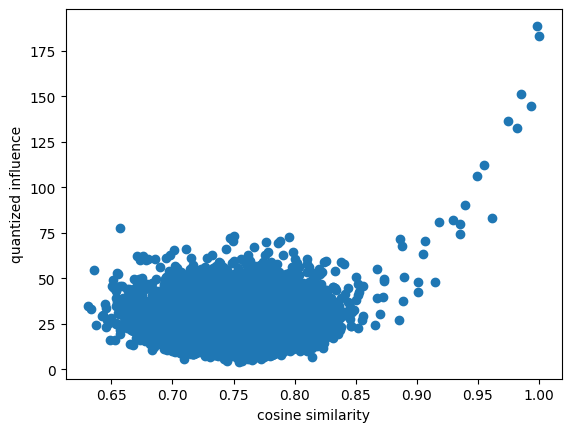

In [ ]:
plt.scatter(list_of_c_scores, list_of_q_scores)
plt.xlabel('cosine similarity')
plt.ylabel('quantized influence')
plt.show()

In [ ]:
%%time

n = 1000
k = 0.001
list_of_k = []
list_of_c_scores = []
list_of_q_scores = []
for k in tqdm(np.arange(0.001, 1000, 0.1)):
    arr1 = np.random.rand(n)  # Example array 1
    arr2 = arr1 + np.random.rand(n)*k  # Example array 2

    c_score = cosine_similarity(arr1, arr2)
    q_score = quantized_influence(arr1, arr2)

    list_of_k.append(k)
    list_of_c_scores.append(c_score)
    list_of_q_scores.append(q_score)

100%|██████████| 10000/10000 [00:11<00:00, 861.92it/s]

CPU times: user 8.15 s, sys: 69.7 ms, total: 8.22 s
Wall time: 11.6 s


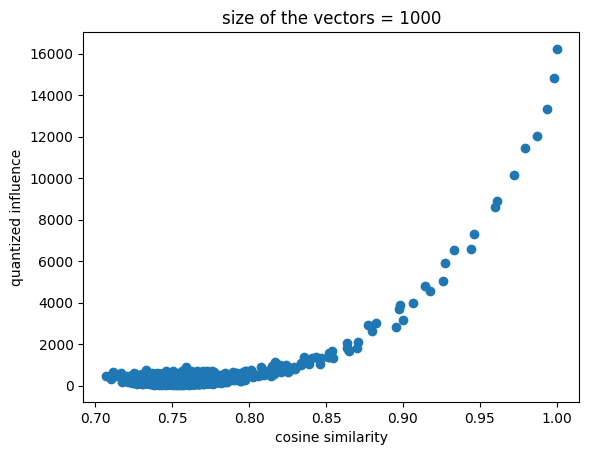

In [ ]:
plt.scatter(list_of_c_scores, list_of_q_scores)
plt.xlabel('cosine similarity')
plt.ylabel('quantized influence')
plt.title(f'size of the vectors = {n}')
plt.show()

In [ ]:
%%time

n = 10000
k = 0.001
list_of_k = []
list_of_c_scores = []
list_of_q_scores = []
for k in tqdm(np.arange(0.001, 1000, 0.1)):
    arr1 = np.random.rand(n)  # Example array 1
    arr2 = arr1 + np.random.rand(n)*k  # Example array 2

    c_score = cosine_similarity(arr1, arr2)
    q_score = quantized_influence(arr1, arr2)

    list_of_k.append(k)
    list_of_c_scores.append(c_score)
    list_of_q_scores.append(q_score)

100%|██████████| 10000/10000 [00:25<00:00, 394.58it/s]

CPU times: user 22.2 s, sys: 148 ms, total: 22.4 s
Wall time: 25.4 s


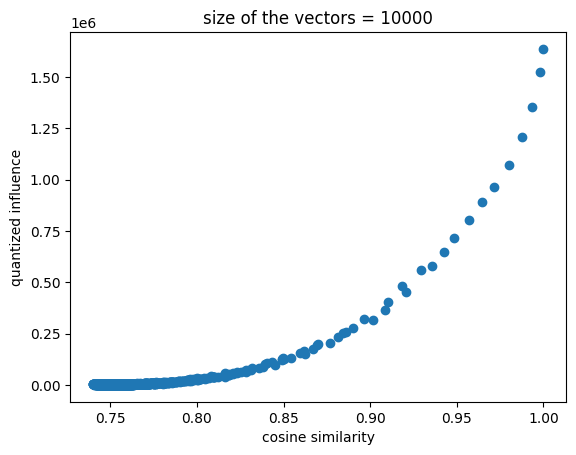

In [ ]:
plt.scatter(list_of_c_scores, list_of_q_scores)
plt.xlabel('cosine similarity')
plt.ylabel('quantized influence')
plt.title(f'size of the vectors = {n}')
plt.show()

## Grid Plots

In [ ]:
import time

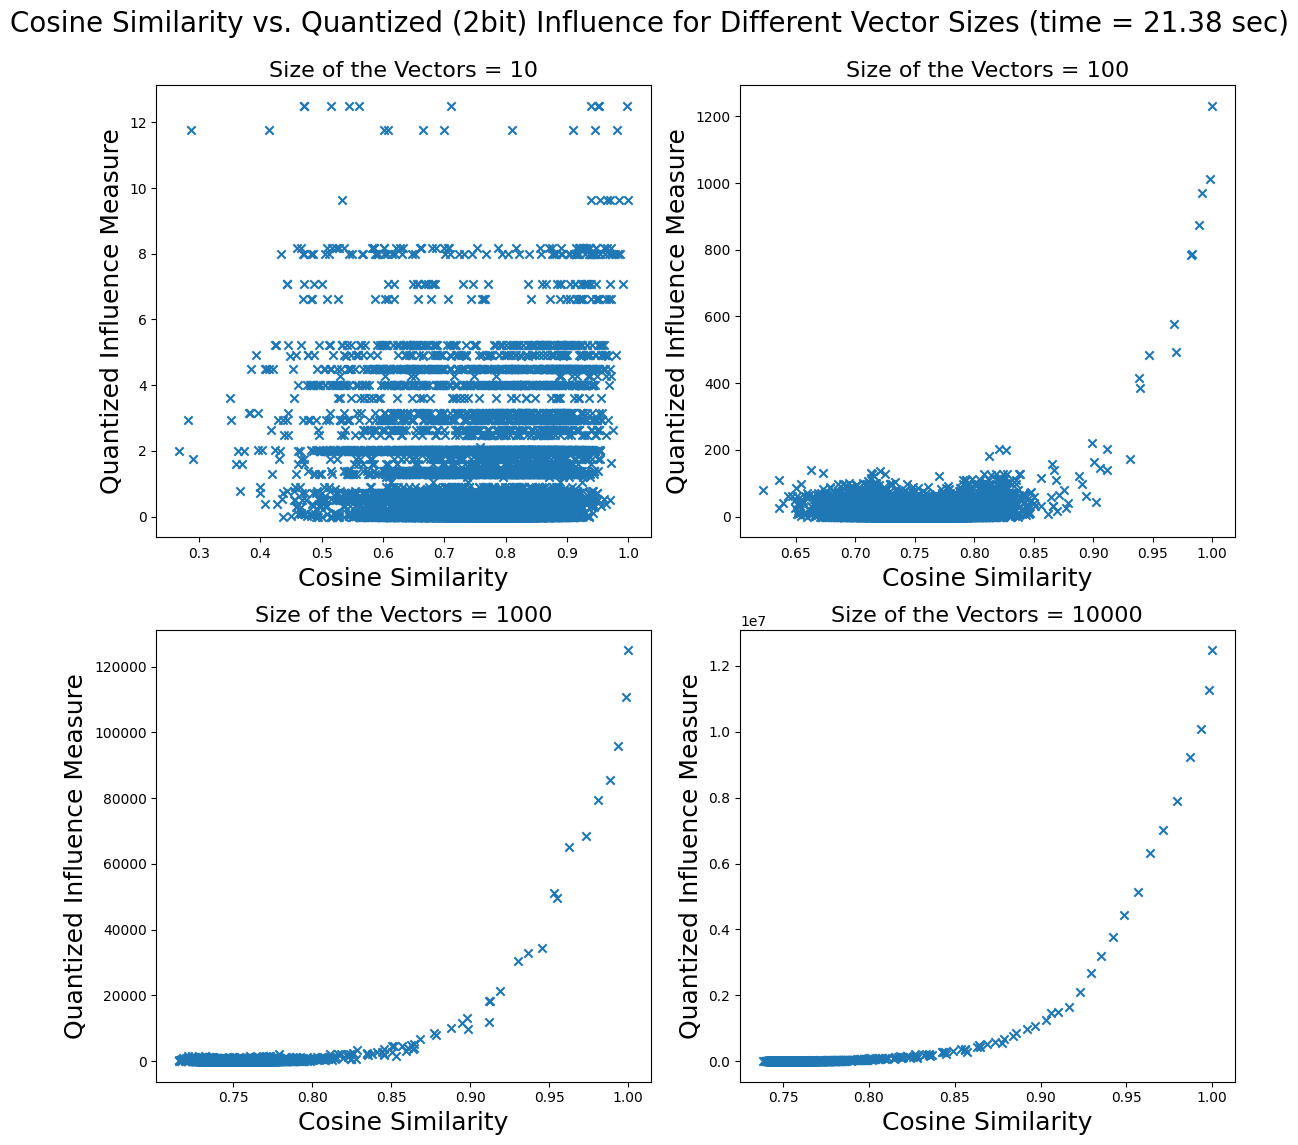

In [ ]:
# Initialize the plot
q=2
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
begin_time = time.time()

# Vector sizes to test
n_values = [10, 100, 1000, 10000]
for ax, n in zip(axs.flatten(), n_values):
    list_of_k = []
    list_of_c_scores = []
    list_of_q_scores = []
    for k in np.arange(0.001, 1000, 0.1):
        arr1 = np.random.rand(n)  # Example array 1
        arr2 = arr1 + np.random.rand(n) * k  # Example array 2

        c_score = cosine_similarity(arr1, arr2)
        q_score = quantized_influence(arr1, arr2, q)

        list_of_k.append(k)
        list_of_c_scores.append(c_score)
        list_of_q_scores.append(q_score)

    ax.scatter(list_of_c_scores, list_of_q_scores, marker="x")
    ax.set_xlabel('Cosine Similarity', fontsize=18)
    ax.set_ylabel('Quantized Influence Measure', fontsize=18)
    ax.set_title(f'Size of the Vectors = {n}', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
end_time = time.time()
time_consumption = end_time - begin_time
fig.suptitle(f'Cosine Similarity vs. Quantized ({q}bit) Influence for Different Vector Sizes (time = {np.round(time_consumption, 2)} sec)', fontsize=20)  # Increased font size
plt.show()


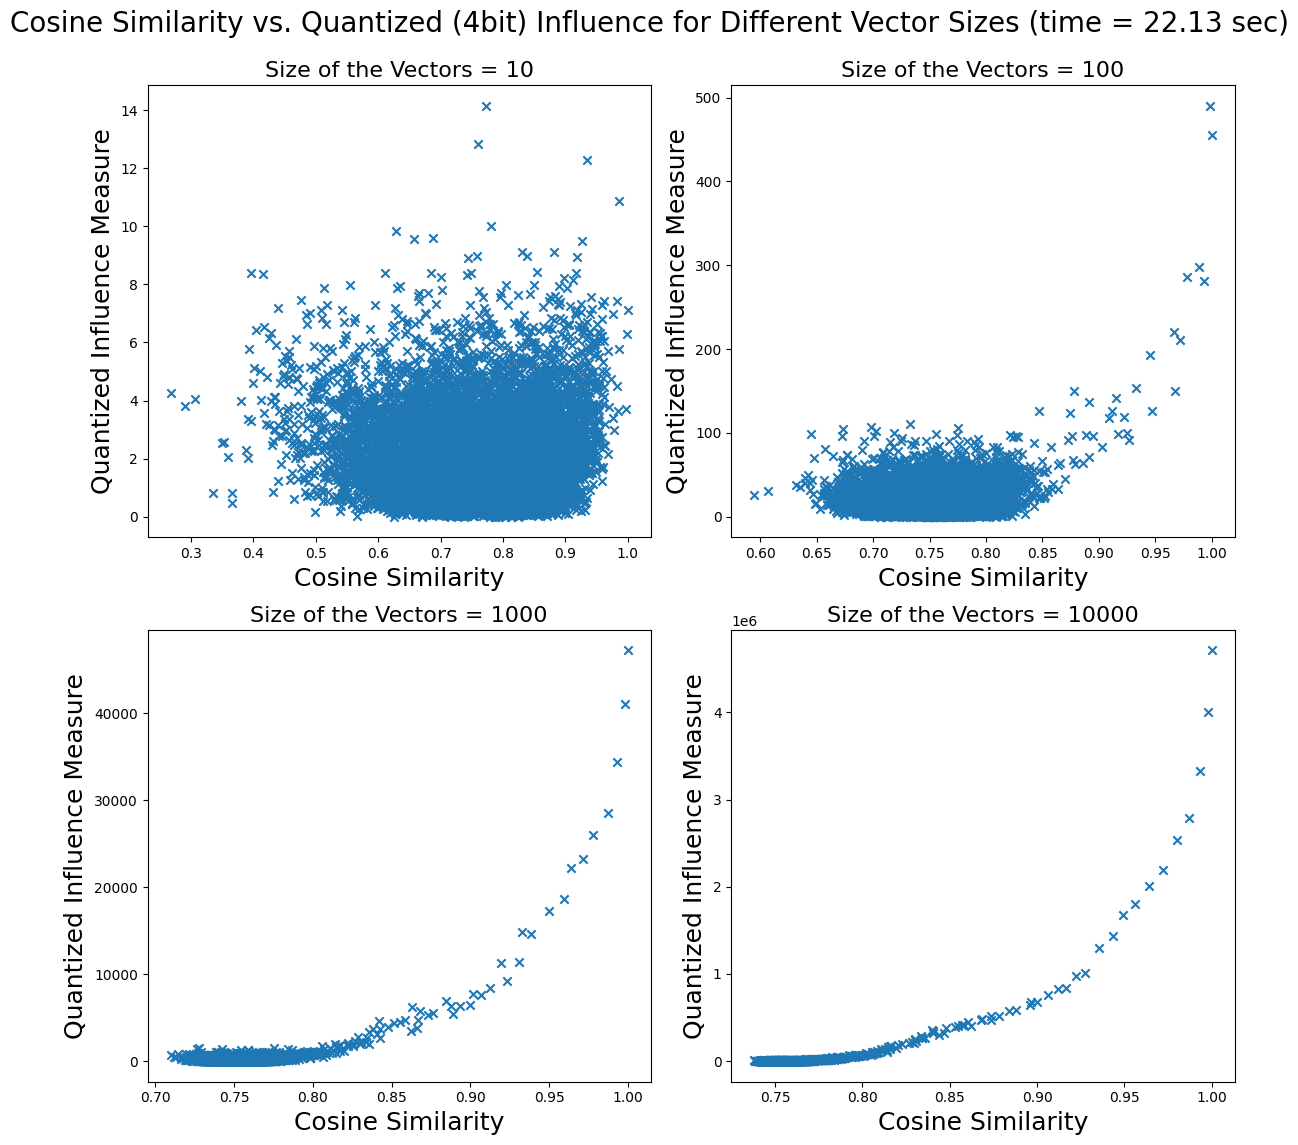

In [ ]:
# Initialize the plot
q=4
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
begin_time = time.time()

# Vector sizes to test
n_values = [10, 100, 1000, 10000]
for ax, n in zip(axs.flatten(), n_values):
    list_of_k = []
    list_of_c_scores = []
    list_of_q_scores = []
    for k in np.arange(0.001, 1000, 0.1):
        arr1 = np.random.rand(n)  # Example array 1
        arr2 = arr1 + np.random.rand(n) * k  # Example array 2

        c_score = cosine_similarity(arr1, arr2)
        q_score = quantized_influence(arr1, arr2, q)

        list_of_k.append(k)
        list_of_c_scores.append(c_score)
        list_of_q_scores.append(q_score)

    ax.scatter(list_of_c_scores, list_of_q_scores, marker="x")
    ax.set_xlabel('Cosine Similarity', fontsize=18)
    ax.set_ylabel('Quantized Influence Measure', fontsize=18)
    ax.set_title(f'Size of the Vectors = {n}', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
end_time = time.time()
time_consumption = end_time - begin_time
fig.suptitle(f'Cosine Similarity vs. Quantized ({q}bit) Influence for Different Vector Sizes (time = {np.round(time_consumption, 2)} sec)', fontsize=20)  # Increased font size
plt.show()


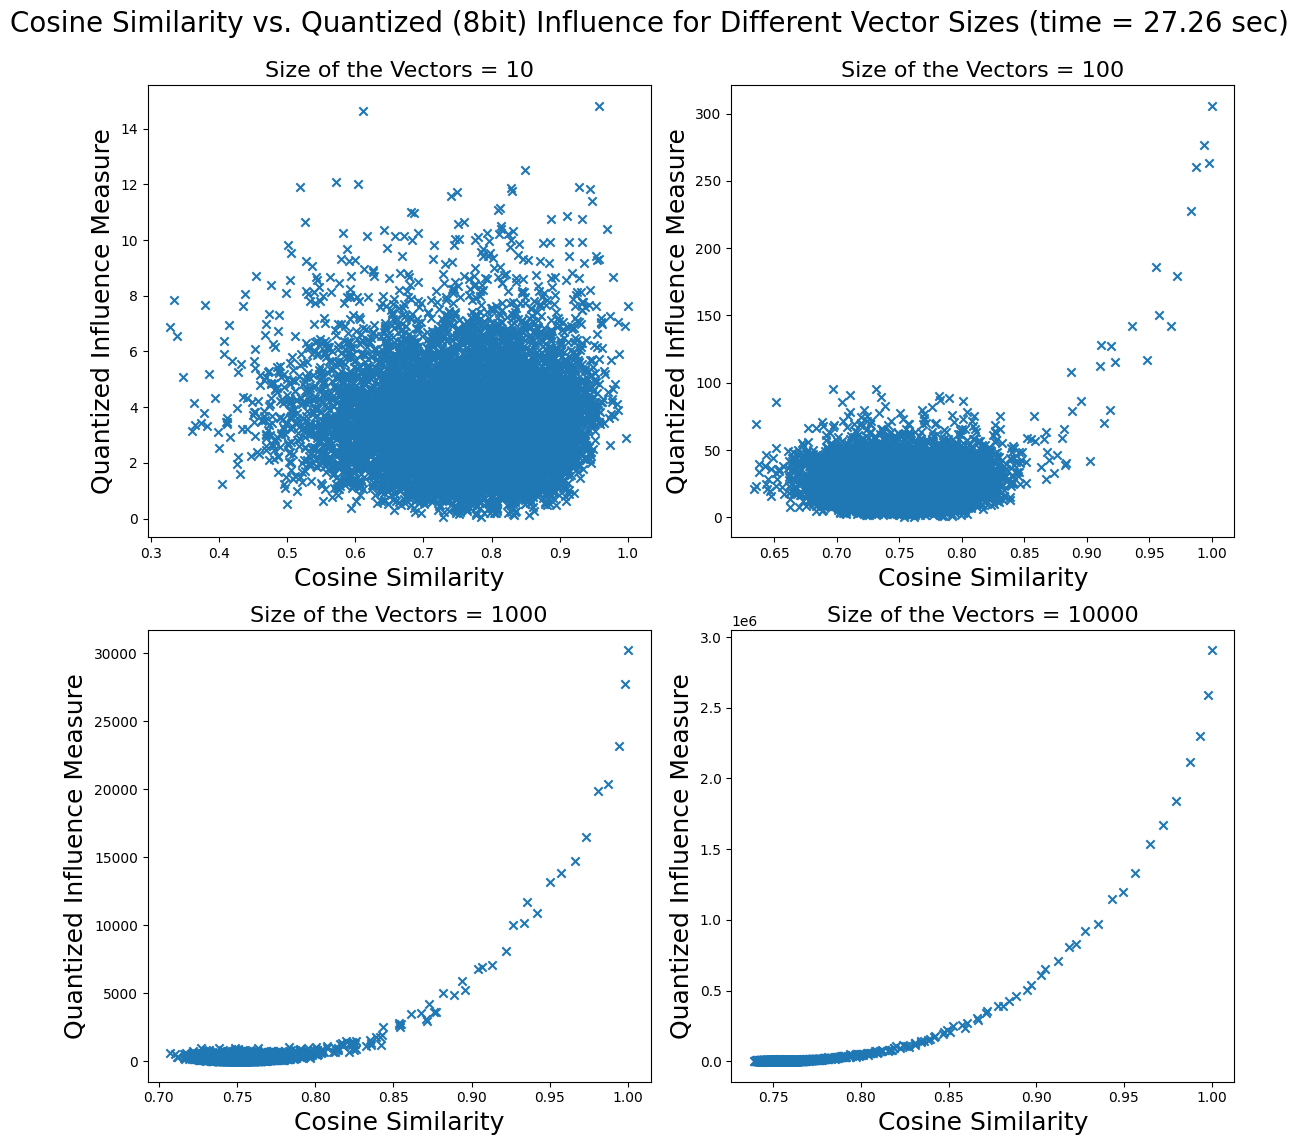

In [ ]:
# Initialize the plot
q=8
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
begin_time = time.time()

# Vector sizes to test
n_values = [10, 100, 1000, 10000]
for ax, n in zip(axs.flatten(), n_values):
    list_of_k = []
    list_of_c_scores = []
    list_of_q_scores = []
    for k in np.arange(0.001, 1000, 0.1):
        arr1 = np.random.rand(n)  # Example array 1
        arr2 = arr1 + np.random.rand(n) * k  # Example array 2

        c_score = cosine_similarity(arr1, arr2)
        q_score = quantized_influence(arr1, arr2, q)

        list_of_k.append(k)
        list_of_c_scores.append(c_score)
        list_of_q_scores.append(q_score)

    ax.scatter(list_of_c_scores, list_of_q_scores, marker="x")
    ax.set_xlabel('Cosine Similarity', fontsize=18)
    ax.set_ylabel('Quantized Influence Measure', fontsize=18)
    ax.set_title(f'Size of the Vectors = {n}', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
end_time = time.time()
time_consumption = end_time - begin_time
fig.suptitle(f'Cosine Similarity vs. Quantized ({q}bit) Influence for Different Vector Sizes (time = {np.round(time_consumption, 2)} sec)', fontsize=20)  # Increased font size
plt.show()


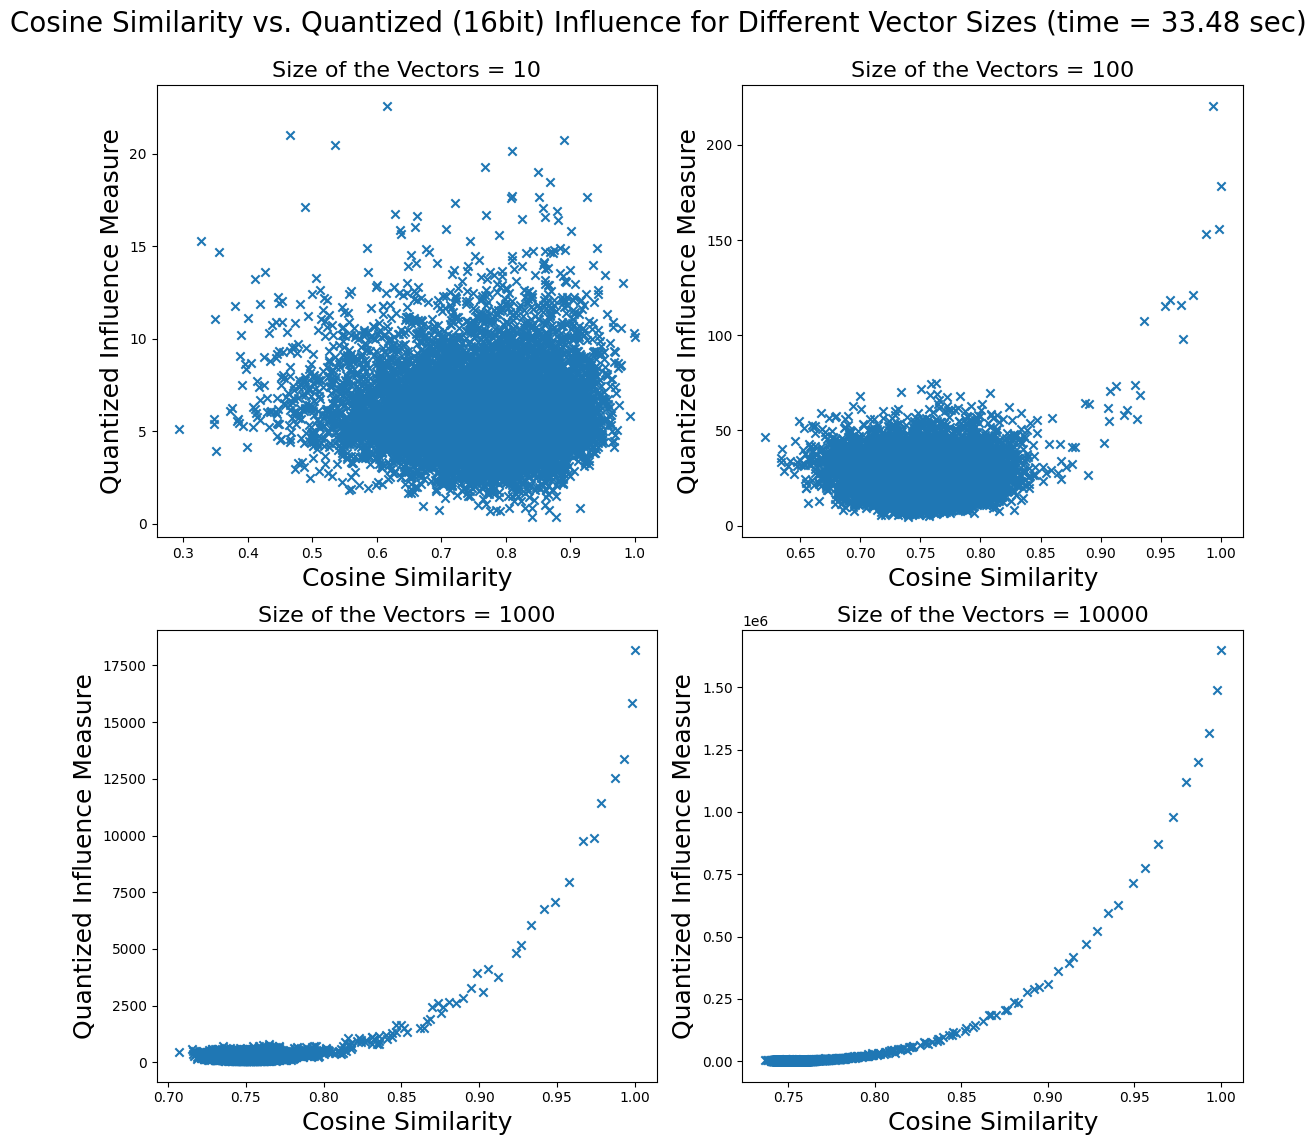

In [ ]:
# Initialize the plot
q=16
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
begin_time = time.time()

# Vector sizes to test
n_values = [10, 100, 1000, 10000]
for ax, n in zip(axs.flatten(), n_values):
    list_of_k = []
    list_of_c_scores = []
    list_of_q_scores = []
    for k in np.arange(0.001, 1000, 0.1):
        arr1 = np.random.rand(n)  # Example array 1
        arr2 = arr1 + np.random.rand(n) * k  # Example array 2

        c_score = cosine_similarity(arr1, arr2)
        q_score = quantized_influence(arr1, arr2, q)

        list_of_k.append(k)
        list_of_c_scores.append(c_score)
        list_of_q_scores.append(q_score)

    ax.scatter(list_of_c_scores, list_of_q_scores, marker="x")
    ax.set_xlabel('Cosine Similarity', fontsize=18)
    ax.set_ylabel('Quantized Influence Measure', fontsize=18)
    ax.set_title(f'Size of the Vectors = {n}', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
end_time = time.time()
time_consumption = end_time - begin_time
fig.suptitle(f'Cosine Similarity vs. Quantized ({q}bit) Influence for Different Vector Sizes (time = {np.round(time_consumption, 2)} sec)', fontsize=20)  # Increased font size
plt.show()


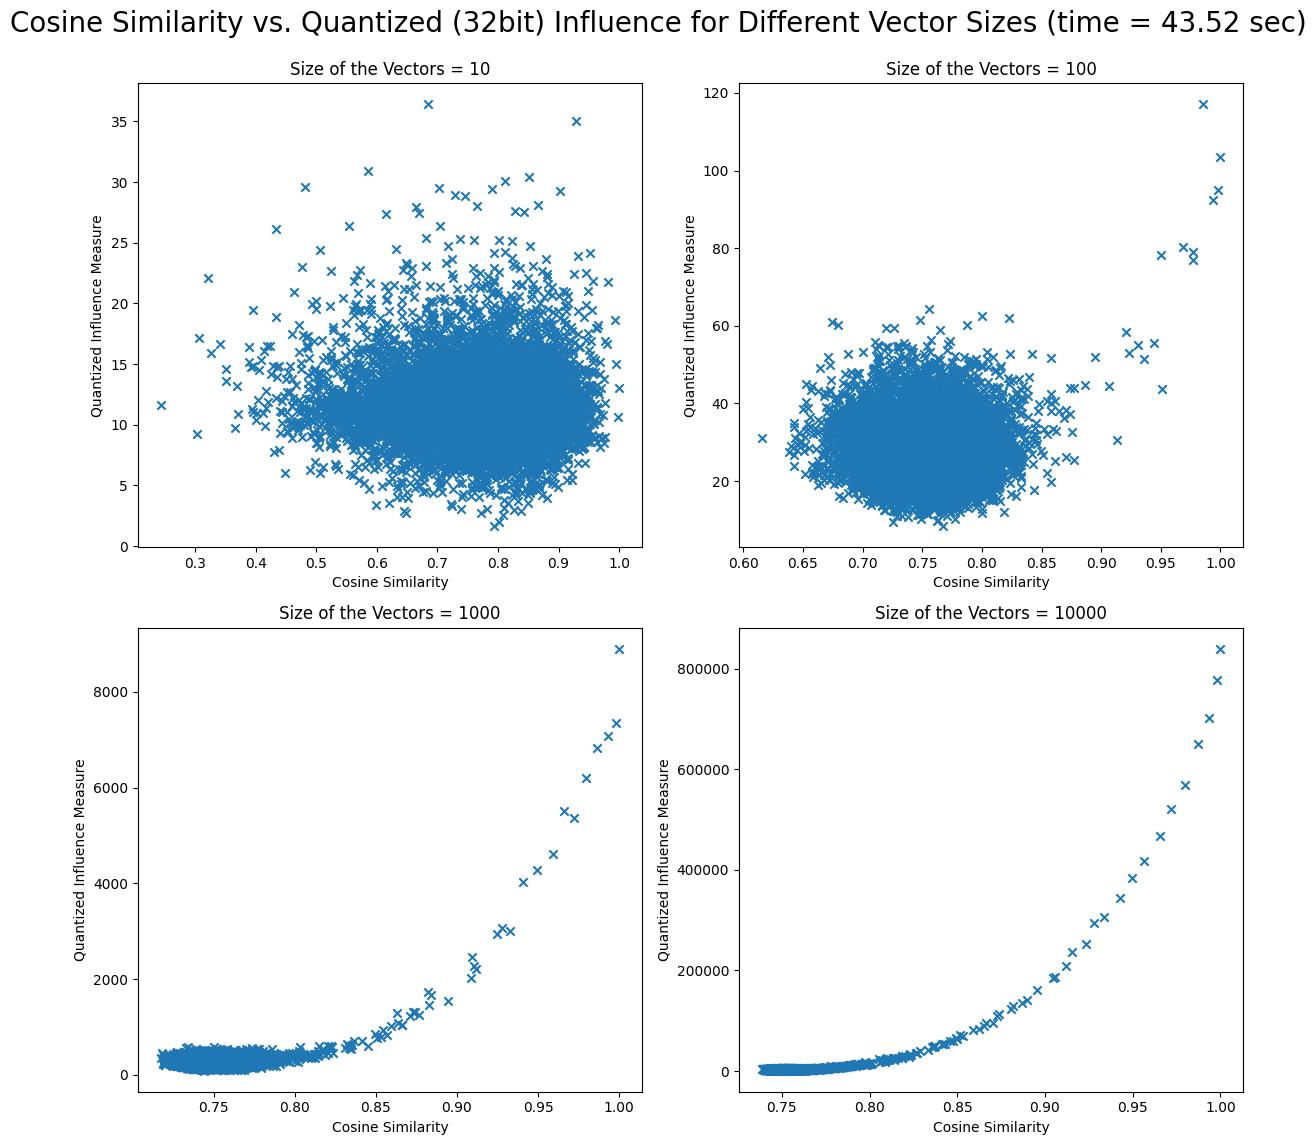

In [ ]:
# Initialize the plot
begin_time = time.time()
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
q=32

# Vector sizes to test
n_values = [10, 100, 1000, 10000]

for ax, n in zip(axs.flatten(), n_values):
    list_of_k = []
    list_of_c_scores = []
    list_of_q_scores = []
    for k in np.arange(0.001, 1000, 0.1):
        arr1 = np.random.rand(n)  # Example array 1
        arr2 = arr1 + np.random.rand(n) * k  # Example array 2

        c_score = cosine_similarity(arr1, arr2)
        q_score = quantized_influence(arr1, arr2, q)

        list_of_k.append(k)
        list_of_c_scores.append(c_score)
        list_of_q_scores.append(q_score)

    ax.scatter(list_of_c_scores, list_of_q_scores, marker="x")
    ax.set_xlabel('Cosine Similarity')
    ax.set_ylabel('Quantized Influence Measure')
    ax.set_title(f'Size of the Vectors = {n}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
end_time = time.time()
time_consumption = end_time - begin_time
fig.suptitle(f'Cosine Similarity vs. Quantized ({q}bit) Influence for Different Vector Sizes (time = {np.round(time_consumption, 2)} sec)', fontsize=20)  # Increased font size
plt.show()


# Custom Loss Function in Tensorflow 2.

> In this post, we will learn how to build custom loss functions with function and class. This is the summary of lecture "Custom Models, Layers and Loss functions with Tensorflow" from DeepLearning.AI.

- toc: true
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Coursera, Tensorflow, DeepLearning.AI]
- image: images/huber_loss_ex.png

## Packages

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Part 1 - Huber Loss

In this section, we'll walk through how to create custom loss functions. In particular, we'll code the [Huber Loss](https://en.wikipedia.org/wiki/Huber_loss) and use that in training the model.

### Prepare the Data

Our dummy dataset is just a pair of arrays `xs` and `ys` defined by the relationship $y = 2x - 1$. `xs` are the inputs while `ys` are the labels.

In [2]:
# inputs
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
# labels
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

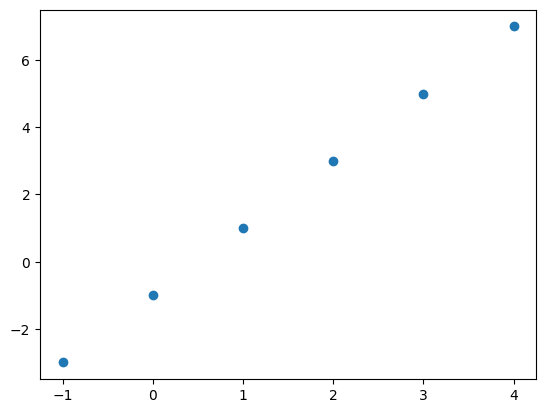

In [3]:
plt.scatter(xs, ys);

### Training the model

Let's build a simple model and train using a built-in loss function like the `mean_squared_error`.

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(xs, ys, epochs=20, verbose=0)

In [5]:
y_mse = model.predict([10.0])
y_mse

1/1 [==============================] - 0s 179ms/step


array([[12.767387]], dtype=float32)

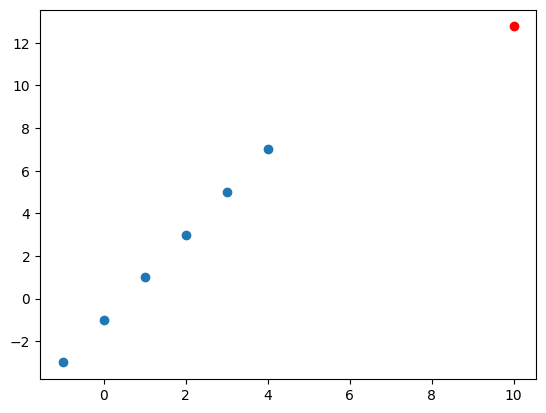

In [6]:
plt.scatter(xs, ys)
plt.scatter(10.0, y_mse, c='r');

### Training with Custom Loss

Now let's see how we can use a custom loss. We first define a function that accepts the ground truth labels (`y_true`) and model predictions (`y_pred`) as parameters. We then compute and return the loss value in the function definition.

The definition of Huber Loss is like this:

$$
L_{\delta}(a) =
\begin{cases}
    \frac{1}{2} (y - f(x))^2 \quad & \text{ for } \vert a \vert \le \delta, \\
    \delta (\vert y - f(x) \vert - \frac{1}{2} \delta) \quad & \text{ otherwise} \\
\end{cases}
$$

In [7]:
def my_huber_loss(y_true, y_pred):
    threshold = 1.
    error = y_true - y_pred
    is_small_error = tf.abs(error) <= threshold
    small_error_loss = tf.square(error) / 2
    big_error_loss = threshold * (tf.abs(error) - threshold / 2)
    return tf.where(is_small_error, small_error_loss, big_error_loss)

In [26]:
def quantize_to_kbit(arr: tf.Tensor, k: int = 16) -> tf.Tensor:
    """Converts a tensor to a k-bit representation by normalizing and scaling its values."""
    arr_min = tf.reduce_min(arr)  # Find minimum value
    arr_max = tf.reduce_max(arr)  # Find maximum value
    normalized_arr = (arr - arr_min) / (arr_max - arr_min)  # Normalize values to [0, 1]
    return tf.cast(tf.round(normalized_arr * (k - 1)), tf.int32)  # Scale and round

def quantized_influence(y_true: tf.Tensor, y_pred: tf.Tensor, k: int = 16) -> tf.Tensor:
    y_true = tf.cast(y_true, tf.float32)  # Ensure compatible data type
    y_pred = tf.cast(y_pred, tf.float32)

    arr1_kbit = quantize_to_kbit(y_true, k)
    arr2_kbit = quantize_to_kbit(y_pred, k)

    unique_values, idx, count = tf.unique_with_counts(tf.reshape(arr1_kbit, [-1]))

    y_bar_global = tf.reduce_mean(tf.cast(arr2_kbit, tf.float32))

    def compute_local_average(val):
        mask = tf.equal(tf.reshape(arr1_kbit, [-1]), val)
        # Ensure the masked tensor is cast to a numerical type for operations
        masked_arr2 = tf.boolean_mask(tf.reshape(arr2_kbit, [-1]), mask)
        masked_arr2 = tf.cast(masked_arr2, tf.float32)  # Cast to float32 for numerical operations
        local_avg = tf.reduce_mean(masked_arr2) - y_bar_global
        count = tf.reduce_sum(tf.cast(mask, tf.float32))  # Ensure count is float32
        return local_avg ** 2 * count ** 2

    weighted_local_averages = tf.map_fn(compute_local_average, unique_values, dtype=tf.float32)
    rescaled_weighted_local_averages = tf.reduce_mean(weighted_local_averages) / tf.math.reduce_std(tf.cast(arr2_kbit, tf.float32))

    return rescaled_weighted_local_averages


Using the loss function is as simple as specifying the loss function in the `loss` argument of `model.compile()`.

In [17]:
ypred = model.predict(xs).reshape(-1)

1/1 [==============================] - 0s 19ms/step


In [20]:
k=16

In [21]:
y_true = tf.cast(ys, tf.float32)  # Ensure compatible data type
y_pred = tf.cast(ypred, tf.float32)

arr1_kbit = quantize_to_kbit(y_true, k)
arr2_kbit = quantize_to_kbit(y_pred, k)

unique_values, idx, count = tf.unique_with_counts(tf.reshape(arr1_kbit, [-1]))

y_bar_global = tf.reduce_mean(tf.cast(arr2_kbit, tf.float32))


In [22]:
def compute_local_average(val):
    mask = tf.equal(tf.reshape(arr1_kbit, [-1]), val)
    # Cast to float32 before computing the mean
    local_avg = tf.reduce_mean(tf.cast(tf.boolean_mask(tf.reshape(arr2_kbit, [-1]), mask), tf.float32), axis=0) - y_bar_global
    return local_avg ** 2 * tf.cast(tf.reduce_sum(mask), tf.float32) ** 2

In [24]:
def compute_local_average(val):
    mask = tf.equal(tf.reshape(arr1_kbit, [-1]), val)
    # Ensure the masked tensor is cast to a numerical type for operations
    masked_arr2 = tf.boolean_mask(tf.reshape(arr2_kbit, [-1]), mask)
    masked_arr2 = tf.cast(masked_arr2, tf.float32)  # Cast to float32 for numerical operations
    local_avg = tf.reduce_mean(masked_arr2) - y_bar_global
    count = tf.reduce_sum(tf.cast(mask, tf.float32))  # Ensure count is float32
    return local_avg ** 2 * count ** 2


In [25]:
weighted_local_averages = tf.map_fn(compute_local_average, unique_values, dtype=tf.float32)
rescaled_weighted_local_averages = tf.reduce_mean(weighted_local_averages) / tf.math.reduce_std(tf.cast(arr2_kbit, tf.float32))

rescaled_weighted_local_averages


<tf.Tensor: shape=(), dtype=float32, numpy=5.123475>

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1,])
])

model.compile(optimizer='sgd', loss=my_huber_loss, metrics=['mse', quantized_influence])
model.fit(xs, ys, epochs=500) # verbose=0

Epoch 1/500
1/1 [==============================] - 1s 959ms/step - loss: 1.9127 - mse: 7.9491 - quantized_influence: 5.1235
Epoch 2/500
1/1 [==============================] - 0s 17ms/step - loss: 1.8816 - mse: 7.7288 - quantized_influence: 5.1235
Epoch 3/500
1/1 [==============================] - 0s 16ms/step - loss: 1.8506 - mse: 7.5125 - quantized_influence: 5.1235
Epoch 4/500
1/1 [==============================] - 0s 14ms/step - loss: 1.8198 - mse: 7.3000 - quantized_influence: 5.1235
Epoch 5/500
1/1 [==============================] - 0s 12ms/step - loss: 1.7890 - mse: 7.0913 - quantized_influence: 5.1235
Epoch 6/500
1/1 [==============================] - 0s 22ms/step - loss: 1.7584 - mse: 6.8865 - quantized_influence: 5.1235
Epoch 7/500
1/1 [==============================] - 0s 14ms/step - loss: 1.7280 - mse: 6.6855 - quantized_influence: 5.1235
Epoch 8/500
1/1 [==============================] - 0s 16ms/step - loss: 1.6976 - mse: 6.4883 - quantized_influence: 5.1235
Epoch 9/500
1/1

In [32]:
y_hl = model.predict([10.0])
y_hl

1/1 [==============================] - 0s 67ms/step


array([[18.730108]], dtype=float32)

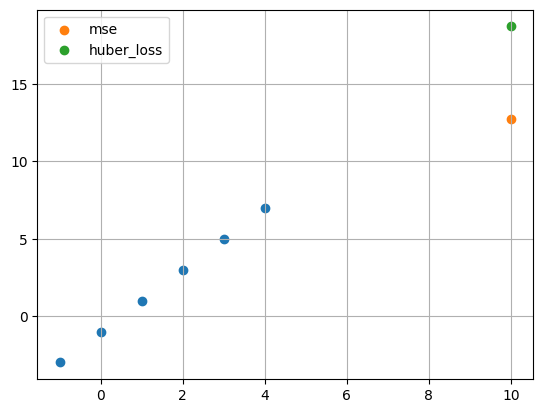

In [33]:
plt.scatter(xs, ys);
plt.scatter(10.0, y_mse, label='mse');
plt.scatter(10.0, y_hl, label='huber_loss');
plt.grid()
plt.legend();

## Part 2 - Huber Loss Hyperparameter and Loss class

In this section, we'll extend our previous Huber loss function and show how you can include hyperparameters in defining loss functions. We'll also look at how to implement a custom loss as an object by inheriting the [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses/Loss) class.

### Prepare the Data

As before, this model will be trained on the `xs` and `ys` below where the relationship is $y = 2x-1$. Thus, later, when we test for `x=10`, whichever version of the model gets the closest answer to `19` will be deemed more accurate.

### Custom loss with hyperparameter

The `loss` argument in `model.compile()` only accepts functions that accepts two parameters: the ground truth (`y_true`) and the model predictions (`y_pred`). If we want to include a hyperparameter that we can tune, then we can define a wrapper function that accepts this hyperparameter.

In [ ]:
# wrapper function that accepts the hyperparameter
def my_huber_loss_with_threshold(threshold):
    # function that accepts the ground truth and predictions
    def my_huber_loss(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) <= threshold
        small_error_loss = tf.square(error) / 2
        big_error_loss = threshold * (tf.abs(error) - (threshold / 2))
        return tf.where(is_small_error, small_error_loss, big_error_loss)
    # return the inner function tuned by the hyperparameter
    return my_huber_loss

We can now specify the `loss` as the wrapper function above. Notice that we can now set the `threshold` value. Try varying this value and see the results you get.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(optimizer='sgd', loss=my_huber_loss_with_threshold(threshold=1.2))
model.fit(xs, ys, epochs=500, verbose=0)

In [ ]:
y_hlt = model.predict([10.0])
y_hlt

array([[18.618975]], dtype=float32)

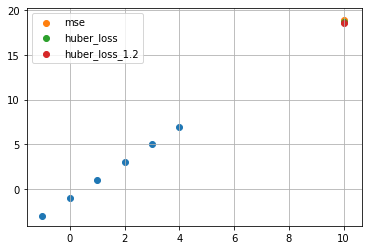

In [ ]:
plt.scatter(xs, ys);
plt.scatter(10.0, y_mse, label='mse');
plt.scatter(10.0, y_hl, label='huber_loss');
plt.scatter(10.0, y_hlt, label='huber_loss_1.2')
plt.grid()
plt.legend();

### Implement Custom Loss as a Class

We can also implement our custom loss as a class. It inherits from the Keras Loss class and the syntax and required methods are shown below.

In [ ]:
from tensorflow.keras.losses import Loss

class MyHuberLoss(Loss):
    # initialize instance attributes
    def __init__(self, threshold=1):
        super(MyHuberLoss, self).__init__()
        self.threshold = threshold

    # Compute loss
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) <= self.threshold
        small_error_loss = tf.square(error) / 2
        big_error_loss = self.threshold * (tf.abs(error) - self.threshold / 2)
        return tf.where(is_small_error, small_error_loss, big_error_loss)

You can specify the loss by instantiating an object from your custom loss class.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1,])
])

model.compile(optimizer='sgd', loss=MyHuberLoss(threshold=1.02))
model.fit(xs, ys, epochs=500, verbose=0)

In [ ]:
y_hltc = model.predict([10.0])
y_hltc

array([[18.58202]], dtype=float32)